In [1]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [2]:
import keras
keras.__version__

'2.9.0'

In [3]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
np.random.seed(10)
print(np.random.randint(10, size=10))

[9 4 0 1 9 0 1 8 9 0]


In [4]:
#import mnist資料集
from keras.datasets import mnist

In [5]:
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [6]:
print('train data=', len(x_train_image))
print(' test data=', len(x_test_image))

train data= 60000
 test data= 10000


In [7]:
print('x_train_image:', x_train_image.shape)
print(x_train_image.shape[0])
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
60000
y_train_label: (60000,)


In [8]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
    
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: 
        num=25
    for i in range(0, num):
        ax= plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title = "label=" + str(labels[idx])
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
            
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([])
        idx+=1
    plt.show()

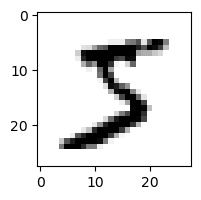

In [9]:
plot_image(x_train_image[0])
# print(x_train_image[0]) //點陣化
# y_train_label[0]
# plot_images_labels_prediction(x_train_image, y_train_label,[],0,10)

In [10]:
# print('x_train_image:', x_train_image.shape)
# print('y_train_label:', y_train_label.shape)

In [11]:
x_Train = x_train_image.reshape(60000,784).astype('float32')
x_Test  = x_test_image.reshape(10000,784).astype('float32')
print('x_train:', x_Train.shape)
print('x_ test:', x_Test.shape)

x_train: (60000, 784)
x_ test: (10000, 784)


In [12]:
# x_Train[0]
x_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [14]:
x_Train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [16]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [17]:
y_Test_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:
# from keras.utils import np_utils
# import numpy as np
# np.random.seed(10)

In [19]:
# from keras.datasets import mnist
# (x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [20]:
# x_Train = x_train_image.reshape(60000,784).astype('float32')
# x_Test = x_test_image.reshape(10000,784).astype('float32')
# x_Train_normalize = x_Train / 255
# x_Test_normalize = x_Test / 255
# y_Train_OneHot = np_utils.to_categorical(y_train_label)
# y_Test_OneHot = np_utils.to_categorical(y_test_label)

In [21]:
# MLP 多元感知器 #Sequential有序的 #Dense稠密的
from keras.models import Sequential
from keras.layers import Dense

In [22]:
# 輸入層。隱藏層。輸出層。超參數
model = Sequential()
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


2022-11-17 14:00:54.146406: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,
            validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 2s - loss: 0.4328 - accuracy: 0.8850 - val_loss: 0.2156 - val_accuracy: 0.9411 - 2s/epoch - 8ms/step
Epoch 2/10
240/240 - 2s - loss: 0.1859 - accuracy: 0.9466 - val_loss: 0.1716 - val_accuracy: 0.9520 - 2s/epoch - 7ms/step
Epoch 3/10
240/240 - 1s - loss: 0.1319 - accuracy: 0.9621 - val_loss: 0.1221 - val_accuracy: 0.9628 - 1s/epoch - 6ms/step
Epoch 4/10
240/240 - 2s - loss: 0.1001 - accuracy: 0.9713 - val_loss: 0.1096 - val_accuracy: 0.9672 - 2s/epoch - 7ms/step
Epoch 5/10
240/240 - 2s - loss: 0.0784 - accuracy: 0.9783 - val_loss: 0.1019 - val_accuracy: 0.9699 - 2s/epoch - 7ms/step
Epoch 6/10
240/240 - 1s - loss: 0.0646 - accuracy: 0.9813 - val_loss: 0.0922 - val_accuracy: 0.9715 - 1s/epoch - 6ms/step
Epoch 7/10
240/240 - 1s - loss: 0.0530 - accuracy: 0.9858 - val_loss: 0.0879 - val_accuracy: 0.9724 - 1s/epoch - 6ms/step
Epoch 8/10
240/240 - 1s - loss: 0.0440 - accuracy: 0.9887 - val_loss: 0.0819 - val_accuracy: 0.9757 - 1s/epoch - 6ms/step
Epoch 9/10
240/240 - 1s 

In [25]:
# 訓練紀錄
# train_history.history

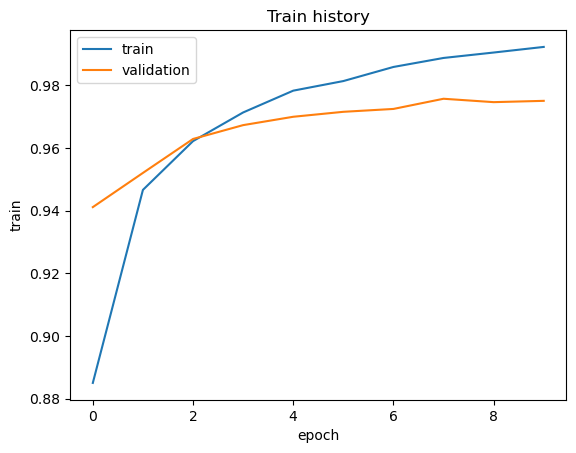

In [26]:
import matplotlib.pyplot as plt

def show_train_history(train_history,train,validation):

  plt.plot(train_history.history[train])
  plt.plot(train_history.history[validation])
  plt.title('Train history')
  plt.ylabel('train')
  plt.xlabel('epoch')

  # 設置圖例在左上角
  plt.legend(['train','validation'],loc='upper left')
  plt.show()
# overfitting
show_train_history(train_history,'accuracy','val_accuracy')

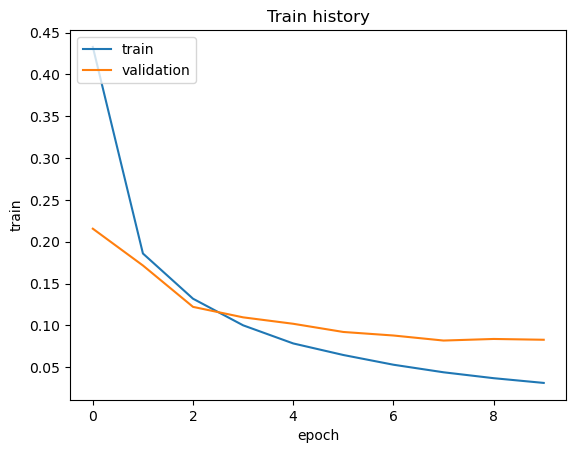

In [27]:
show_train_history(train_history,'loss','val_loss')

In [28]:
scores=model.evaluate(x_Test_normalize,y_Test_OneHot)
model.save('st.h5') #副檔名一定要是h5
print()
print('loss    ',scores[0])
print('accuracy',scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0728 - accuracy: 0.9784

loss     0.07279637455940247
accuracy 0.9783999919891357


313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


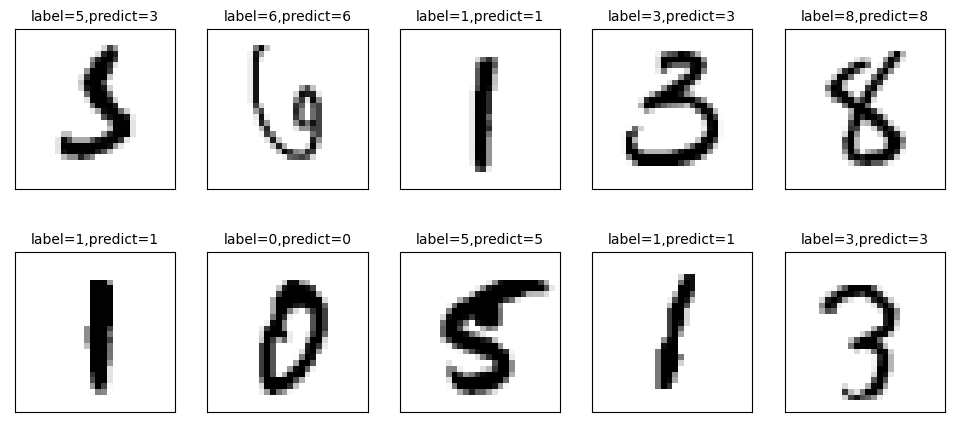

In [29]:
predict_x=model.predict(x_Test) 
prediction=np.argmax(predict_x,axis=1)

# prediction=model.predict_classes(x_Test) 已廢棄替換
print(prediction)

plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340)

In [30]:
import pandas as pd

pd.crosstab(y_test_label,prediction,rownames=['label'],colnames=['prediction'])

prediction,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,971,0,1,0,2,0,3,1,2,0
1,0,1125,4,0,0,1,2,0,3,0
2,4,2,1003,3,2,0,3,6,9,0
3,0,0,1,996,0,1,0,3,5,4
4,0,0,0,1,971,0,5,0,0,5
5,3,0,0,14,1,858,6,1,7,2
6,4,2,1,1,3,3,942,0,2,0
7,2,3,8,4,1,0,0,1000,3,7
8,6,0,2,5,5,0,1,3,949,3


In [31]:
df = pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:10]

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


In [32]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
1670,5,3
2035,5,3
2810,5,3
3702,5,3
3902,5,3
4355,5,3
4360,5,3


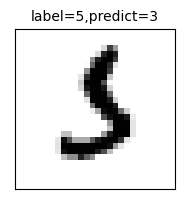

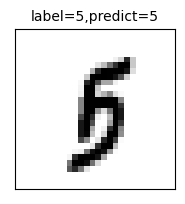

In [33]:
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=340,num=1)
plot_images_labels_prediction(x_test_image,y_test_label,prediction,idx=4300,num=1)

In [34]:
model= Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1000)              785000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [35]:
# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_Train_normalize,y=y_Train_OneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)

Epoch 1/10
240/240 - 4s - loss: 2.0163 - accuracy: 0.7367 - val_loss: 1.7083 - val_accuracy: 0.8897 - 4s/epoch - 15ms/step
Epoch 2/10
240/240 - 3s - loss: 1.5126 - accuracy: 0.9028 - val_loss: 1.3220 - val_accuracy: 0.9198 - 3s/epoch - 13ms/step
Epoch 3/10
240/240 - 3s - loss: 1.1848 - accuracy: 0.9186 - val_loss: 1.0451 - val_accuracy: 0.9237 - 3s/epoch - 13ms/step
Epoch 4/10
240/240 - 3s - loss: 0.9447 - accuracy: 0.9245 - val_loss: 0.8418 - val_accuracy: 0.9281 - 3s/epoch - 12ms/step
Epoch 5/10
240/240 - 3s - loss: 0.7681 - accuracy: 0.9299 - val_loss: 0.6946 - val_accuracy: 0.9308 - 3s/epoch - 12ms/step
Epoch 6/10
240/240 - 4s - loss: 0.6392 - accuracy: 0.9319 - val_loss: 0.5867 - val_accuracy: 0.9317 - 4s/epoch - 15ms/step
Epoch 7/10
240/240 - 3s - loss: 0.5452 - accuracy: 0.9347 - val_loss: 0.5081 - val_accuracy: 0.9348 - 3s/epoch - 13ms/step
Epoch 8/10
240/240 - 3s - loss: 0.4754 - accuracy: 0.9373 - val_loss: 0.4511 - val_accuracy: 0.9348 - 3s/epoch - 13ms/step
Epoch 9/10
240/2

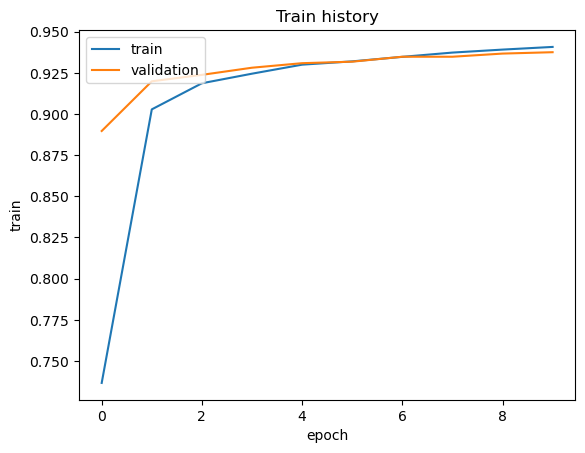

In [36]:
show_train_history(train_history,'accuracy','val_accuracy')

In [37]:
from keras.models import Sequential
from keras.layers import Dense

# 主要加入這個 dropout
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='softmax'))
model.add(Dropout(0.5))
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))
print(model.summary())

# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
show_train_history(train_history,'accuracy','val_accuracy')

NameError: name 'y_TrainOneHot' is not defined

In [ ]:
scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])

In [ ]:
model = Sequential()

model(Dense(units=1000,input_dim=784,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1000,kernel_initializer='normal',activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=10,kernel_initializer='normal',activation='softmax'))


# 開始訓練
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,y=y_TrainOneHot,validation_split=0.2,epochs=20,batch_size=200,verbose=2)

In [ ]:
show_train_history(train_history,'accuracy','val_accuracy')

scores=model.evaluate(x_Test_normalize,y_TestOneHot)
print()
print('accuracy',scores[1])

print(model.summary())